<a href="https://colab.research.google.com/github/o-bollverk/msf/blob/main/resnet34_entire_unbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resnet 34 on entire unbalanced dataset

In [ ]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
#from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import warnings
import pandas as pd
import os 
import torch
from fastai.vision.data import *
import fastai
from pathlib import Path
from shutil import copyfile
import random
import shutil
import tensorflow as tf
import tensorflow_addons as tfa
from PIL import Image
from datetime import datetime


Classes:

Airbus A320neo

Boeing 747-8 Intercontinental

Aviat Pitts Special S2S

Cub Crafter X Cub

Daher TBM 930

Diamond DA40NG

Diamond DA62

EXTRA 330LT



https://www.windowscentral.com/list-microsoft-flight-simulator-planes


##### Check that you have Fastai version 1.0.61           

When running the fastai cells twice, you can get an error that numpy object has no attribute func. In that case, run the package import cell again.

This notebook was run on a GTX 1080 with Ryzen 2600x on Ubuntu 20.04 with Nvidia drivers selected.

Cloning the repository

In [ ]:
# Clone the entire repo.
#!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
#%cd cloned-repo
#!ls

In [ ]:
#! git pull

In [ ]:
nimede_vastavus = pd.DataFrame({"web_name": np.sort(listdir("all_data_color/")),
                                "game_name": np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")]))})

In [ ]:
print(np.sort(listdir("all_data_color/")))
print(np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")])))

['airbus_color' 'aviat s2s_color' 'boeing 747_color' 'cessna 152_color' 'cessna 172_color' 'cessna 208_color'
 'cessna cj4_color' 'cub crafters xcub_color' 'daher tbm 930_color' 'diamond da40_color' 'diamond da62_color'
 'extra 330_color']
['airbus' 'aviat' 'boeing' 'cessna_152' 'cessna_172' 'cessna_208' 'cessna_cj' 'cubcraft' 'daher' 'diamond40ng'
 'diamondda62' 'extra']


In [ ]:
! mkdir random_selection_train_all
! mkdir random_selection_test_all


# For unbalaced set (all data)

In [ ]:
# creating temporary folder for selected files
from shutil import copyfile
import random
import shutil

def abifun(x):
    return x[:len(nimede_vastavus.game_name[i])] == nimede_vastavus.game_name[i]
 
for i in range(nimede_vastavus.shape[0]):
    
    web_files = listdir("all_data_color/" + nimede_vastavus.web_name[i])
    game_files_clear = listdir("msf_data/image_data_clear/")    
    game_files_clear_selected = np.array(game_files_clear)[[abifun(x) for x in game_files_clear]]
    game_files_rainy = listdir("msf_data/image_data_rainy/")
    game_files_rainy_selected = np.array(game_files_rainy)[[abifun(x) for x in game_files_rainy]]

    # making a random selection
    
    max_taken =len(web_files)
  
    selected_web = random.sample(web_files, max_taken)
    selected_web2 = ["all_data_color/" + nimede_vastavus.web_name[i] + "/" + x for x in selected_web]
    
    selected_web2_test = selected_web2[0:int(len(selected_web2)*0.2)]
    selected_web2_train = selected_web2[int(len(selected_web2)*0.2):]

    
    selected_clear = random.sample(set(game_files_clear_selected), len(game_files_clear_selected))
    selected_clear2 = ["msf_data/image_data_clear/" + x for x in selected_clear]
    selected_clear2_test = selected_clear2[0:int(len(selected_clear2)*0.2)]
    selected_clear2_train = selected_clear2[int(len(selected_clear2)*0.2):]

    
    selected_rainy = random.sample(set(game_files_rainy_selected), len(game_files_rainy_selected))
    selected_rainy2 = ["msf_data/image_data_rainy/" + x for x in selected_rainy]
    selected_rainy2_test = selected_rainy2[0:int(len(selected_rainy2)*0.2)]
    selected_rainy2_train = selected_rainy2[int(len(selected_rainy2)*0.2):]

    complete_selection_train = np.concatenate([selected_web2_train, selected_clear2_train, selected_rainy2_train])
    complete_selection_test = np.concatenate([selected_web2_test, selected_clear2_test, selected_rainy2_test])
    os.mkdir("random_selection_train_all/" +  nimede_vastavus.game_name[i])
    for filename in complete_selection_train:
        shutil.copy(filename, "random_selection_train_all/" +  nimede_vastavus.game_name[i])

    os.mkdir("random_selection_test_all/" +  nimede_vastavus.game_name[i])
    for filename in complete_selection_test:
        shutil.copy(filename, "random_selection_test_all/" +  nimede_vastavus.game_name[i])

## Using the train folder for training

In [ ]:
import warnings

path = Path("random_selection_train_all")
warnings.filterwarnings('ignore')

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# annab warningut 

In [ ]:
data.classes

['airbus',
 'aviat',
 'boeing',
 'cessna_152',
 'cessna_172',
 'cessna_208',
 'cessna_cj',
 'cubcraft',
 'daher',
 'diamond40ng',
 'diamondda62',
 'extra']

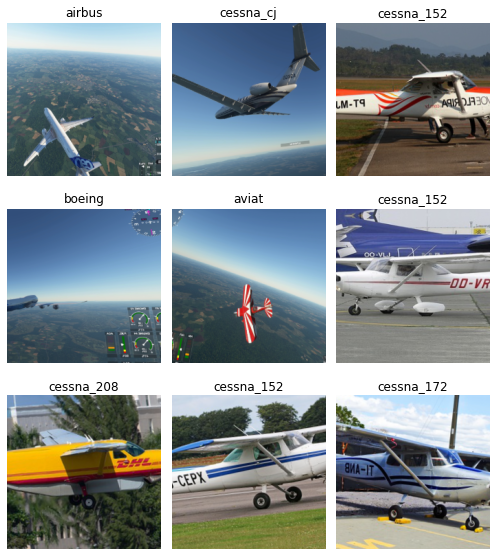

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airbus',
  'aviat',
  'boeing',
  'cessna_152',
  'cessna_172',
  'cessna_208',
  'cessna_cj',
  'cubcraft',
  'daher',
  'diamond40ng',
  'diamondda62',
  'extra'],
 12,
 23467,
 5866)

## Train model - resnet 34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(15)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

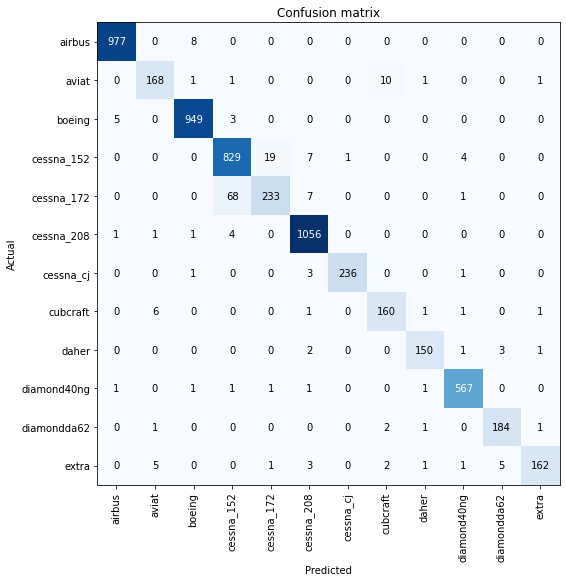

In [ ]:
interp.plot_confusion_matrix(figsize = (8,8)) #change plot 


In [ ]:
warnings.filterwarnings('ignore')

tulemused = []
correct_labels = []
for i in listdir("random_selection_test"):
    for j in listdir("random_selection_test" + "/" + i):
        correct_labels.append(i)
        img = open_image("random_selection_test/" + i +"/" + j)
        pred_class,pred_idx,outputs = learn.predict(img)
        vastus = data.classes[int(pred_class)]
        tulemused = np.append(tulemused, vastus)

accuracy = sum(tulemused == correct_labels)/len(correct_labels)

print("Mixed accuracy: " + str(accuracy)) #Mixed images from game and internet.


Mixed accuracy: 0.9727777777777777


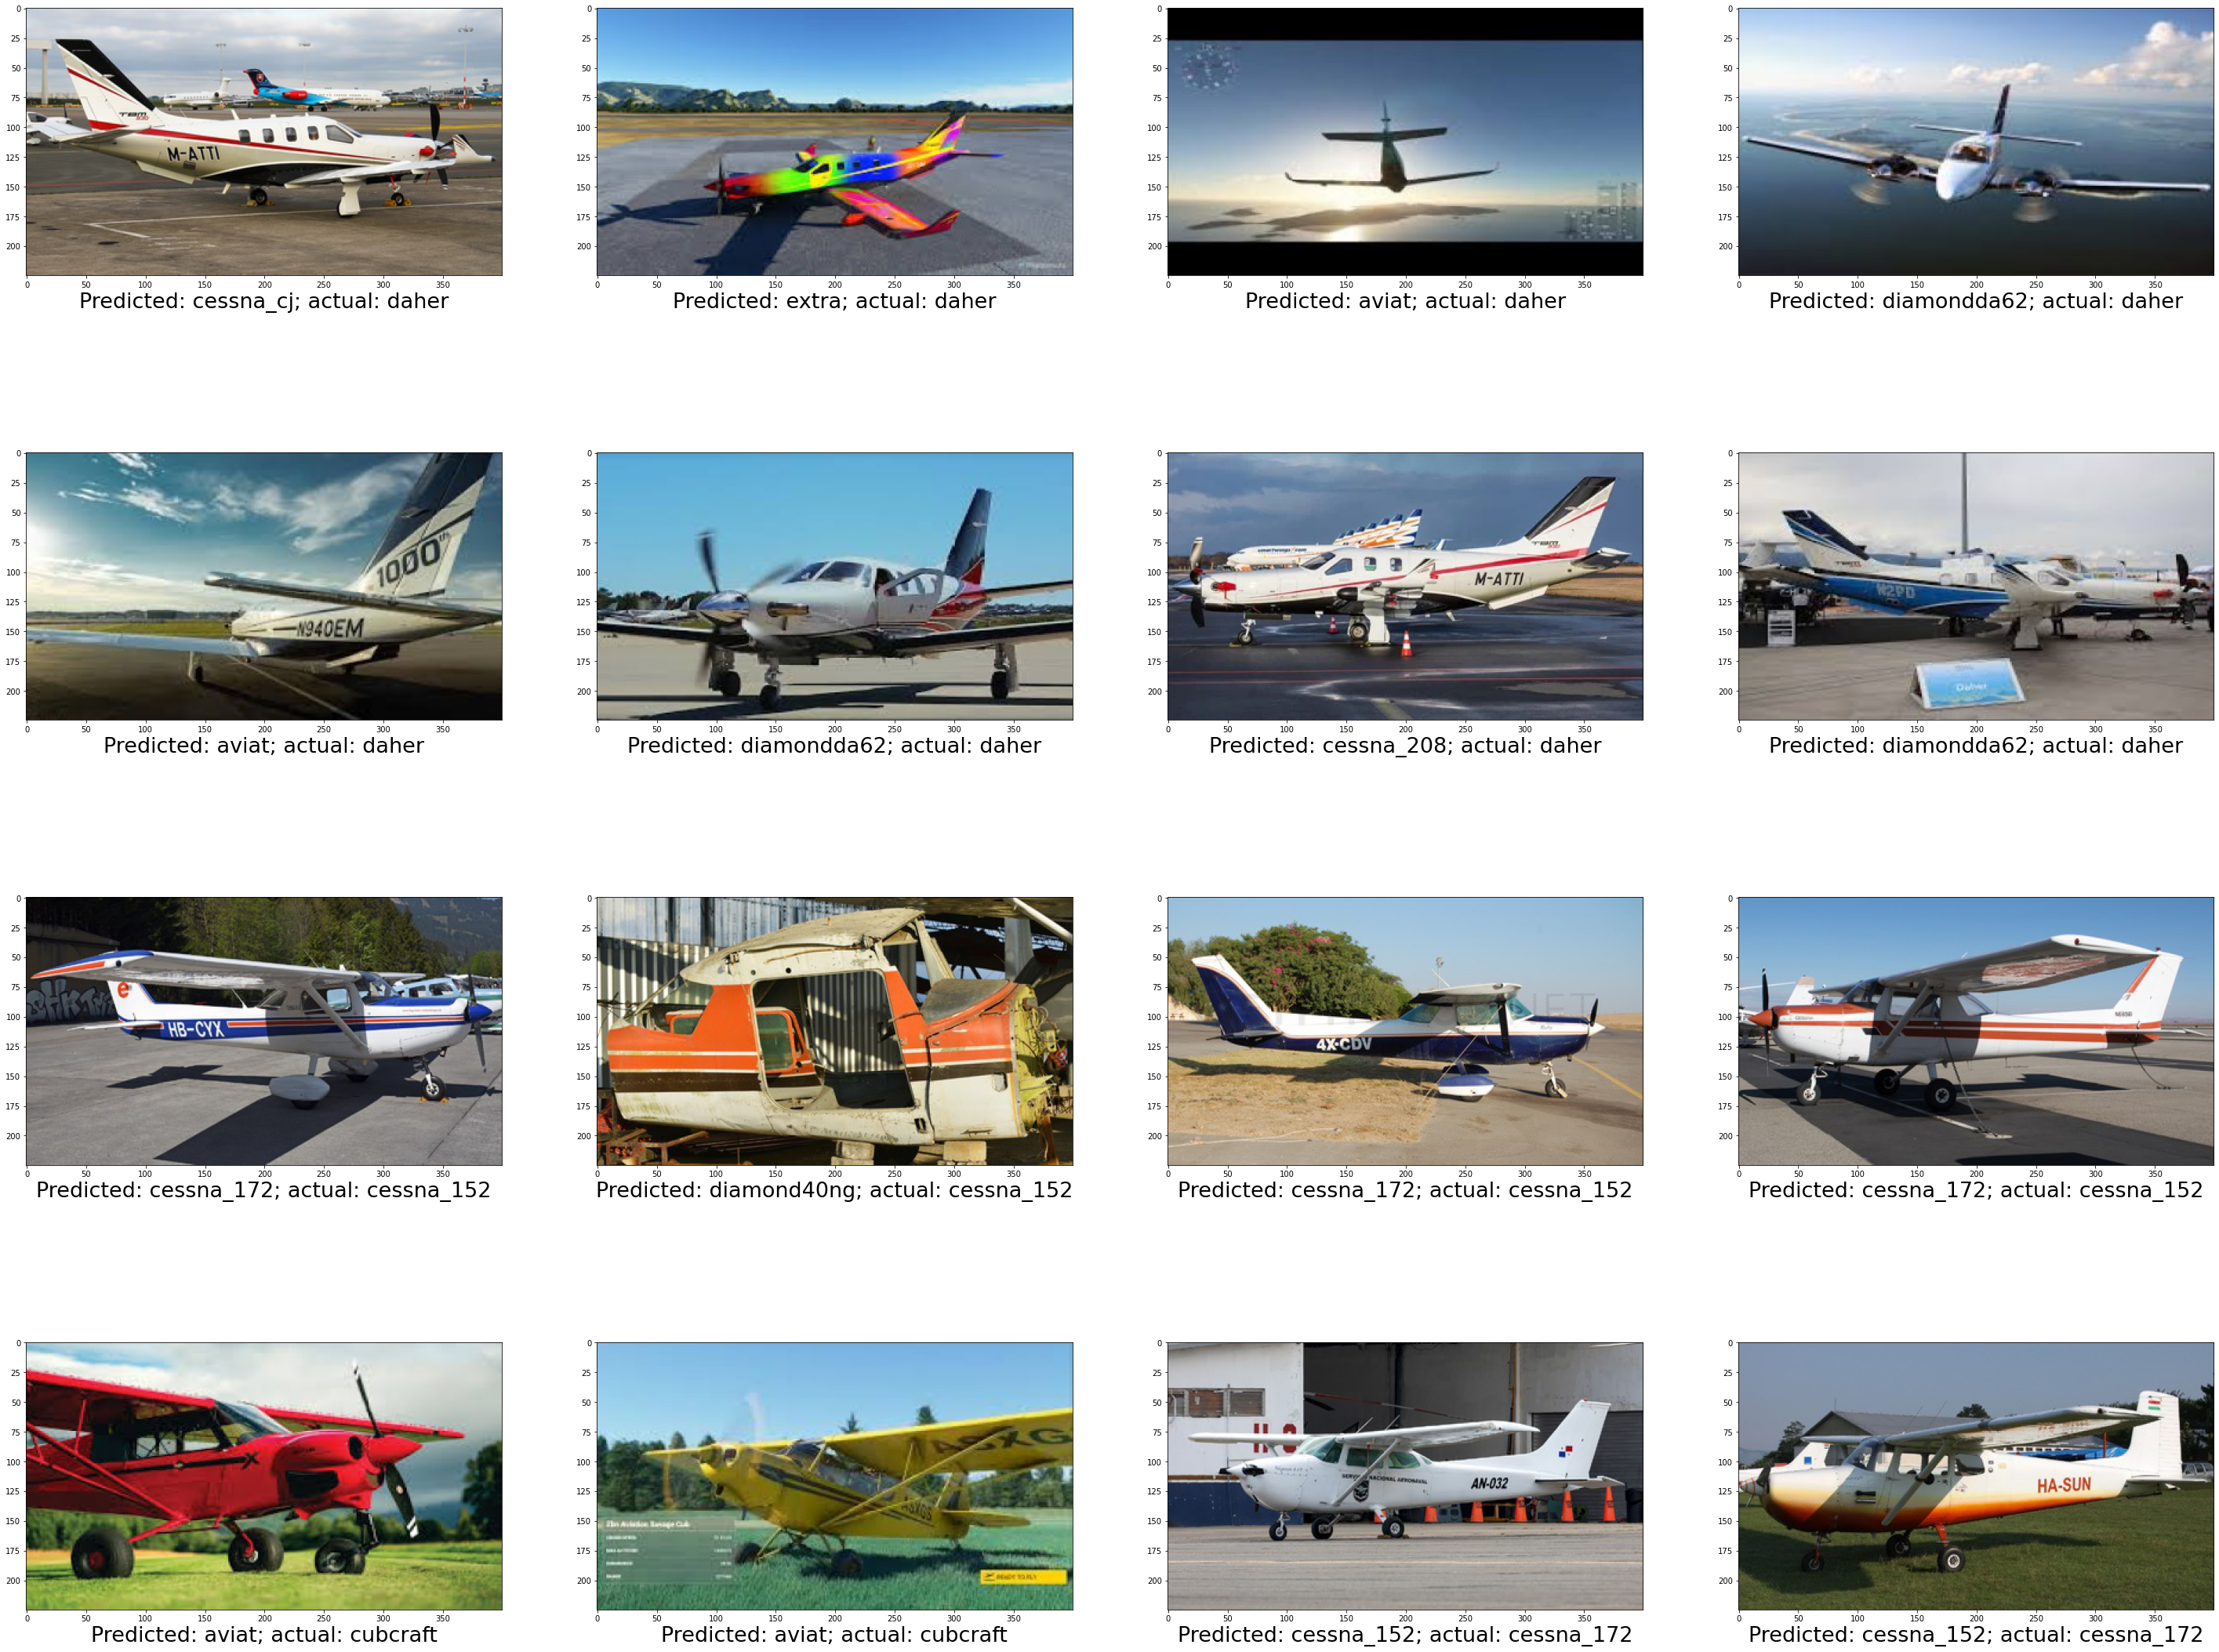

In [ ]:
predictions = pd.DataFrame({"correct": correct_labels, "prediction": tulemused})
predicted_wrong = predictions[predictions.correct != predictions.prediction]

image_locs = []
for i in listdir("random_selection_test"):
  for j in listdir("random_selection_test" + "/" + i):
    image_loc = "random_selection_test" + "/" + i +"/" + j
    image_locs.append(image_loc)
    
# Misclassified cases:

veerge = 4
ridu = 4
fig, axs = plt.subplots(ridu, veerge, figsize = (50, 40))
counter = -1
predictions_wrong = predictions[predictions.correct != predictions.prediction]

for row in axs:
  for col in row:
      counter = counter + 1
      col.imshow(Image.open(np.array(image_locs)[tulemused != correct_labels][counter]))     
      col.set_xlabel("Predicted: " + predictions_wrong.iloc[counter,:].prediction + "; actual: " + predictions_wrong.iloc[counter,].correct)
      col.xaxis.label.set_size(27)
    